In [1]:
from datetime import date, datetime, timedelta
# import pandas as pd
import numpy as np
import glob
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import datetime
# sys.path.insert(0, "../tools")
from covid19model.data.mobility import * # contains all necessary functions
from covid19model.visualization.output import *
from covid19model.data.sciensano import get_sciensano_COVID19_data_spatial
from covid19model.data.mobility import get_google_mobility_data

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
# Import Sciensano data
sciensano_df = get_sciensano_COVID19_data_spatial(agg='arr', values='hospitalised_IN', moving_avg=True).sum(axis=1)
sciensano_values= sciensano_df.values
sciensano_dates = sciensano_df.index

# Google Mobility Data per activity

<IPython.core.display.Javascript object>


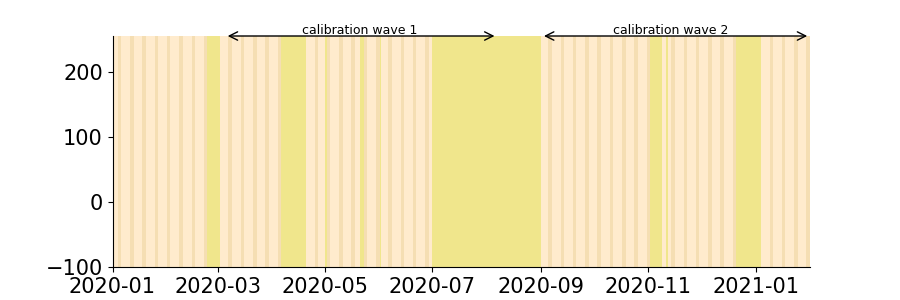

In [3]:
start_date = datetime.datetime(2020, 1, 1, 0, 0)
end_date = datetime.datetime(2021, 2, 1, 0, 0)
start_calibration_wave1 = pd.Timestamp(2020, 3, 5, 0, 0)
end_calibration_wave1 = pd.Timestamp(2020, 8, 7, 0, 0)
start_calibration_wave2 = pd.Timestamp(2020, 9, 1, 0, 0)
end_calibration_wave2 = pd.Timestamp(2021, 2, 1, 0, 0)

fig, ax = plt.subplots(figsize=(9,3))
ax.grid(False)
ax.set_xlim(start_date, end_date)
ymin, ymax = (-100, 255)
ax.set_ylim(ymin, ymax)
color_timeframes(start_date, end_date, ax=ax)
# ax.set_title('test', size=14)

# Add shading denoting calibration periods
label_cal_size = 9
label_cal_move_up = 3
arrow_height = ymax
ax.annotate(s='', xy=(start_calibration_wave1,arrow_height), xytext=(end_calibration_wave1,arrow_height), \
            arrowprops=dict(arrowstyle='<->'))
label_cal1_move_right = 44 # days
ax.text(start_calibration_wave1 + pd.Timedelta(days=label_cal1_move_right), \
        ymax + label_cal_move_up, 'calibration wave 1', size=label_cal_size)

ax.annotate(s='', xy=(start_calibration_wave2,arrow_height), xytext=(end_calibration_wave2,arrow_height), \
            arrowprops=dict(arrowstyle='<->'))
label_cal2_move_right = 41 # days
ax.text(start_calibration_wave2 + pd.Timedelta(days=label_cal2_move_right), \
        ymax + label_cal_move_up, 'calibration wave 2', size=label_cal_size)

ticklabelsize = 12


**Insert Google Mobility parameters**

In [4]:
google_df = get_google_mobility_data(update=False)
google_df_dates = google_df.index.values
google_df.columns

Index(['retail_recreation', 'grocery', 'parks', 'transport', 'work',
       'residential'],
      dtype='object')

In [5]:
plt.style.use('seaborn-dark-palette')

linewidth=1
# colors = dict({'retail_recreation' : 'cornflowerblue',
#                'grocery' : 'firebrick',
#                'parks' : 'slategray',
#                'transport' : 'deeppink',
#                'work' : 'darkmagenta',
#                'residential' : 'darkturquoise'})
for loc in google_df.columns:
    if loc=='retail_recreation':
        ax.plot(google_df_dates, google_df[loc], linewidth=linewidth, label='retail & recreation') #  color=colors[loc],
    else:
        ax.plot(google_df_dates, google_df[loc], linewidth=linewidth, label=loc) #  color=colors[loc],
ax.legend(fontsize = ticklabelsize-2, loc='upper right', bbox_to_anchor=(0.27, 1))
ax.set_ylabel('mobility % to baseline', size=ticklabelsize)

plt.axhline(0, linestyle='--', linewidth=1, color='k', alpha=0.4)

plt.setp(ax.get_xticklabels(), Fontsize=ticklabelsize)
plt.setp(ax.get_yticklabels(), Fontsize=ticklabelsize)

plt.savefig('google-mobility-data.png', dpi=400, bbox_inches='tight')

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
